# DNN

Using TensorFlow backend.


數據集長度 154
原始训练集的长度： 107
原始测试集的长度： 47
转为监督学习，训练集数据长度： 99
转为监督学习，测试集数据长度： 39


2022-07-12 16:24:45.105293: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-12 16:24:45.106912: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 79 samples, validate on 20 samples
Epoch 1/100
79/79 [==============================] - 1s 8ms/step - loss: 0.0209 - acc: 0.2532 - val_loss: 0.0150 - val_acc: 0.2500
Epoch 2/100
79/79 [==============================] - 0s 194us/step - loss: 0.0196 - acc: 0.2532 - val_loss: 0.0112 - val_acc: 0.2500
Epoch 3/100
79/79 [==============================] - 0s 264us/step - loss: 0.0187 - acc: 0.2532 - val_loss: 0.0094 - val_acc: 0.2500
Epoch 4/100
79/79 [==============================] - 0s 227us/step - loss: 0.0178 - acc: 0.2532 - val_loss: 0.0092 - val_acc: 0.2500
Epoch 5/100
79/79 [==============================] - 0s 237us/step - loss: 0.0172 - acc: 0.2532 - val_loss: 0.0096 - val_acc: 0.2500
Epoch 6/100
79/79 [==============================] - 0s 271us/step - loss: 0.0168 - acc: 0.2532 - val_loss: 0.0099 - val_acc: 0.2500
Epoch 7/100
79/79 [==============================] - 0s 263us/step - loss: 0.0162 - acc: 0.2532 - val_loss: 0.0106 - val_acc: 0.2500
Epoch 8/100
79/79 [========

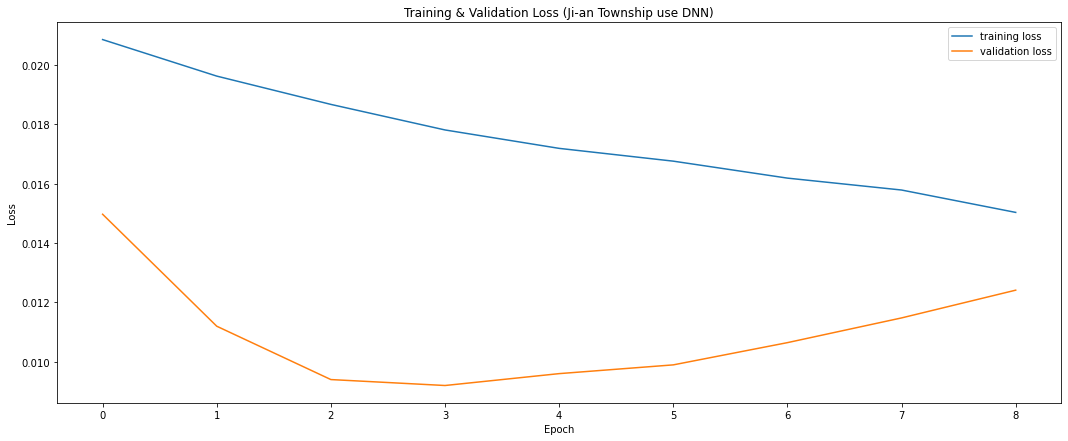

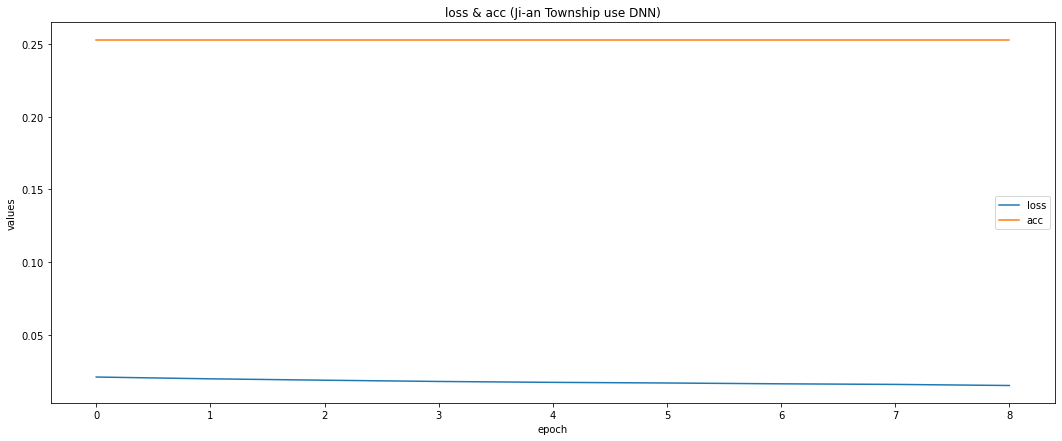

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 8,101
Trainable params: 8,101
Non-trainable params: 0
_________________________________________________________________
Train Score: 6.88 RMSE
Test Score: 16.30 RMSE


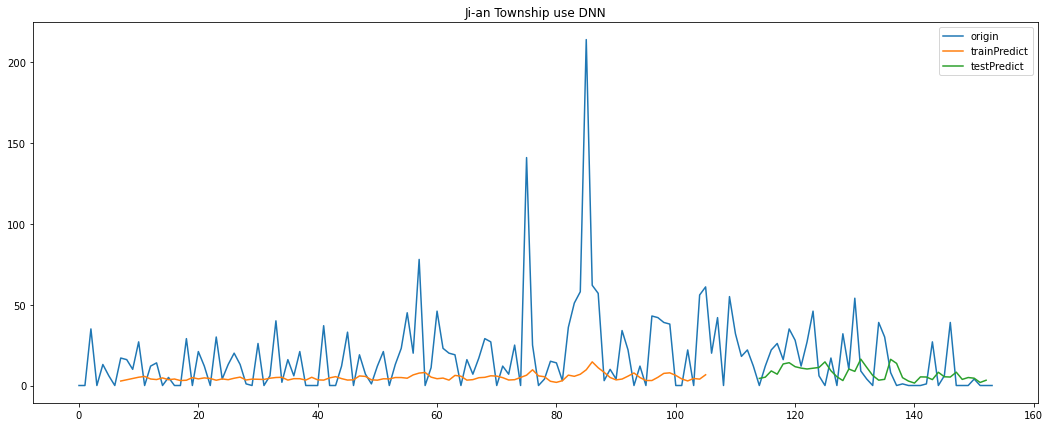

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from keras.callbacks import EarlyStopping

# load the dataset
# import data
path = 'PATH'
data = pd.read_csv(path)

# NaN轉為0
data = data.fillna(0)

# 將float轉為integer
#data = data.astype('int')

print('數據集長度', len(data))
dataset = data.values
#print(dataset)


# fix random seed for reproducibility
numpy.random.seed(7)

# 将数据拆分成训练和测试，2/3作为训练数据
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("原始训练集的长度：",train_size)
print("原始测试集的长度：",test_size)

# X是給定時間(t)的乘客人數，Y是下一次(t + 1)的乘客人數。
# look_back為步長。
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        # X按照顺序取值
        dataX.append(a)
        # Y向後移動一位取值
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


# 數據正規化
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

# 构建监督学习型数据
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back) 
print("转为监督学习，训练集数据长度：", len(trainX))
# print(trainX,trainY)
print("转为监督学习，测试集数据长度：",len(testX))
# print(testX, testY )

# 數據為3D [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
#testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
#print('构造得到模型的输入数据(训练数据已有标签trainY): ',trainX.shape,testX.shape)

###

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0,
                              patience = 5, verbose = 1, mode = 'min',
                              baseline = None, restore_best_weights = True)

###
model_dnn=Sequential()

model_dnn.add(Dense(50, input_dim = look_back, activation='relu'))
model_dnn.add(Dense(50, activation='relu'))   
model_dnn.add(Dense(50, activation='relu'))   
model_dnn.add(Dense(50, activation='relu'))
model_dnn.add(Dense(1))
###

model_dnn.compile(loss='mse', optimizer='adam', metrics = ['acc'])

model_dnn_history = model_dnn.fit(trainX, trainY, validation_split = 0.2, epochs=100, batch_size = 10, verbose=1,
                                  callbacks = [early_stopping])
print('評估成效：', model_dnn.evaluate(testX, testY, verbose=1))


# summarize history for accuracy
plt.figure(figsize=(18,7))
plt.plot(model_dnn_history.history['loss'])
plt.plot(model_dnn_history.history['val_loss'])
plt.title('Training & Validation Loss (Ji-an Township use DNN)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training loss', 'validation loss'], loc='best')
plt.show()

# summarize history for accuracy
plt.figure(figsize=(18,7))
plt.plot(model_dnn_history.history['loss'])
plt.plot(model_dnn_history.history['acc'])
plt.title('loss & acc (Ji-an Township use DNN)')
plt.ylabel('values')
plt.xlabel('epoch')
plt.legend(['loss', 'acc'], loc='best')
plt.show()

###
# 打印模型
model_dnn.summary()

# 預測
trainPredict = model_dnn.predict(trainX)
testPredict = model_dnn.predict(testX)

# 還原預測值
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 計算誤差
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

abc = numpy.array((154, 1))

# shift train predictions for plotting
trainPredictPlot = numpy.ones(abc)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.ones(abc)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(18,7))
plt.plot(dataset, label = 'origin')

#plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, label = 'trainPredict')
plt.plot(testPredictPlot, label = 'testPredict')
plt.title('Ji-an Township use DNN')
plt.legend(loc = 'best')
plt.show()

# RNN

數據集長度 154
原始訓練集的長度： 107
原始测試集的長度： 47
轉為監督式學習，訓練集數據長度： 99
轉為監督式學習，測試集數據長度： 39
Train on 79 samples, validate on 20 samples
Epoch 1/100
 - 3s - loss: 0.0237 - acc: 0.2532 - val_loss: 0.0126 - val_acc: 0.2500
Epoch 2/100
 - 0s - loss: 0.0189 - acc: 0.2532 - val_loss: 0.0116 - val_acc: 0.2500
Epoch 3/100
 - 0s - loss: 0.0184 - acc: 0.2532 - val_loss: 0.0110 - val_acc: 0.2500
Epoch 4/100
 - 0s - loss: 0.0176 - acc: 0.2532 - val_loss: 0.0109 - val_acc: 0.2500
Epoch 5/100
 - 0s - loss: 0.0159 - acc: 0.2532 - val_loss: 0.0117 - val_acc: 0.2500
Epoch 6/100
 - 0s - loss: 0.0152 - acc: 0.2532 - val_loss: 0.0122 - val_acc: 0.2500
Epoch 7/100
 - 0s - loss: 0.0148 - acc: 0.2532 - val_loss: 0.0164 - val_acc: 0.2500
Epoch 8/100
 - 0s - loss: 0.0139 - acc: 0.2532 - val_loss: 0.0132 - val_acc: 0.2500
Epoch 9/100
 - 0s - loss: 0.0160 - acc: 0.2532 - val_loss: 0.0130 - val_acc: 0.2500
Restoring model weights from the end of the best epoch
Epoch 00009: early stopping
評估成效： [0.08649975691850369, 0.3589743673

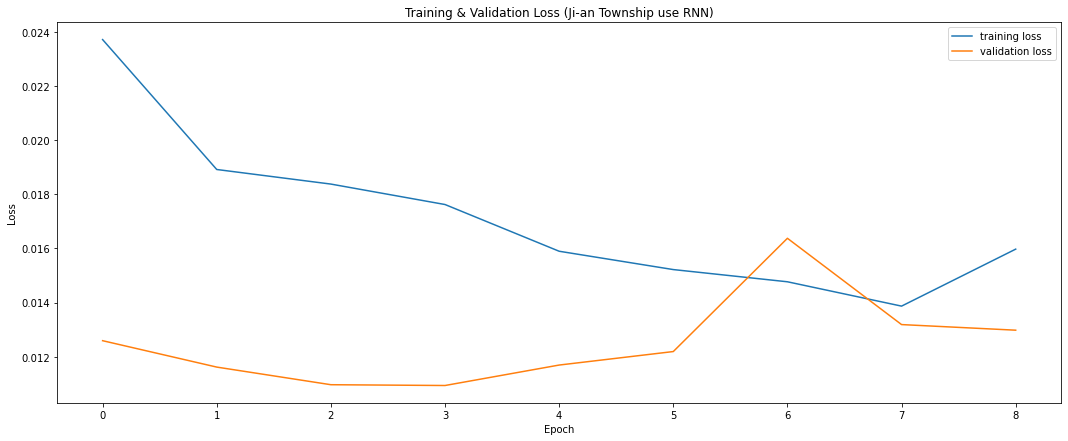

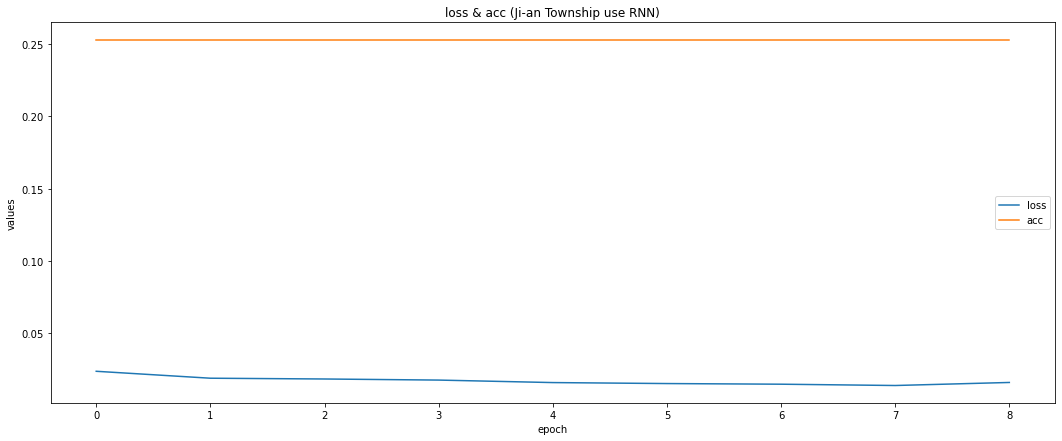

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 7, 50)             2600      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 7, 50)             5050      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 7, 50)             5050      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 17,801
Trainable params: 17,801
Non-trainable params: 0
_________________________________________________________________
Train Score: 6.66 RMSE
Test Score: 16.18 RMSE


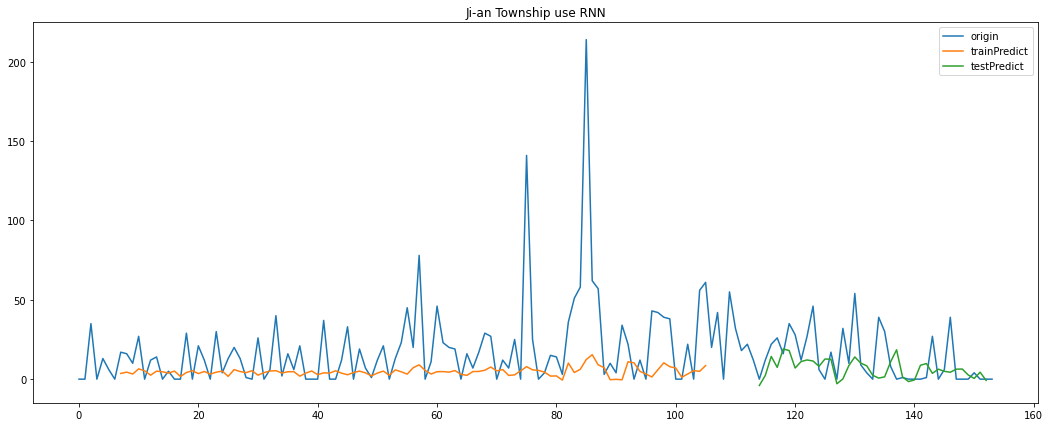

In [3]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

# load the dataset
# import data
path = 'PATH'
data = pd.read_csv(path)

# NaN轉為0
data = data.fillna(0)

# 將float轉為integer
#data = data.astype('int')

print('數據集長度', len(data))
dataset = data.values
#print(dataset)

# 將數據拆分成訓練和测試，2/3作為訓練集
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("原始訓練集的長度：",train_size)
print("原始测試集的長度：",test_size)

# X是給定時間(t)的乘客人数，Y是下一次(t + 1)的乘客人数。
# 将值数组转换为数据集矩阵,look_back是步長。
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        # X按照顺序取值
        dataX.append(a)
        # Y向後移動一位取值
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# 數據缩放
scaler = MinMaxScaler(feature_range=(0, 1))
#dataset = scaler.fit_transform(dataset)
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

# 建構監督式學習數據
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back) 
print("轉為監督式學習，訓練集數據長度：", len(trainX))
# print(trainX,trainY)
print("轉為監督式學習，測試集數據長度：",len(testX))
# print(testX, testY )

# 數據為3D [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

###
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0,
                              patience = 5, verbose = 1, mode = 'min',
                              baseline = None, restore_best_weights = True)

# SimpleRNN
model = Sequential()

model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True, input_shape = (trainX.shape[1],1)))
#model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
#model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
#model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50))
#model.add(Dropout(0.2))

model.add(Dense(units = 1))
                                                                                             
                                                                                             
# create and fit the LSTM network
#model = Sequential()
#model.add(LSTM(50, input_shape=(1, look_back)))
#model.add(Dense(5))
#model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
history = model.fit(trainX, trainY, validation_split=0.2, epochs=100, batch_size=10, verbose=2,
                    callbacks = [early_stopping])

print('評估成效：', model.evaluate(testX, testY, verbose=2))

# summarize history for accuracy
plt.figure(figsize=(18,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training & Validation Loss (Ji-an Township use RNN)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training loss', 'validation loss'], loc='best')
plt.show()



# summarize history for accuracy
plt.figure(figsize=(18,7))
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.title('loss & acc (Ji-an Township use RNN)')
plt.ylabel('values')
plt.xlabel('epoch')
plt.legend(['loss', 'acc'], loc='best')
plt.show()

# 打印模型
model.summary()

# 开始预测
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 逆缩放预测值
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 计算误差
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

abc = numpy.array((154, 1))

# shift train predictions for plotting
trainPredictPlot = numpy.ones(abc)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.ones(abc)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(18,7))
plt.plot(dataset, label = 'origin')

#plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, label = 'trainPredict')
plt.plot(testPredictPlot, label = 'testPredict')
plt.title('Ji-an Township use RNN')
plt.legend(loc = 'best')
plt.show()